In [2]:
pip install ta

  Created wheel for ta: filename=ta-0.9.0-py3-none-any.whl size=28908 sha256=d2c29b673367110c047fba067d1f4b64310ff8f3cac18930dc02e2f54563f89a
  Stored in directory: /root/.cache/pip/wheels/72/78/64/cc1c01506a1010a9845e9bd7c69333730f7174661228ea4f98
Successfully built ta


In [5]:
pip install yfinance --upgrade --no-cache-dir

In [8]:
import pandas as pd
import numpy as np
from ta.trend import SMAIndicator
import yfinance as yf

#Matiplotlib
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('ggplot')

In [35]:
asset = 'EURUSD=X'
start_date = '2010-01-01'
end_date = '2020-12-04'
data = yf.download(asset, interval = '1d', start = start_date, end = end_date)

[*********************100%***********************]  1 of 1 completed


In [36]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-01,1.432706,1.440196,1.432706,1.438994,1.438994,0
2010-01-04,1.431004,1.445191,1.426208,1.442398,1.442398,0
2010-01-05,1.442710,1.448310,1.435194,1.436596,1.436596,0
2010-01-06,1.436596,1.443460,1.429123,1.440403,1.440403,0
2010-01-07,1.440300,1.444481,1.430206,1.431803,1.431803,0
...,...,...,...,...,...,...
2020-11-30,1.197074,1.200206,1.194415,1.197146,1.197146,0
2020-12-01,1.193773,1.205357,1.193599,1.193816,1.193816,0
2020-12-02,1.206986,1.210742,1.204079,1.207438,1.207438,0


# Definiendo SMA's con sus respectivas posiciones de Compra o Venta

In [37]:
# Inicializamos el indicador en las variables
sma_short = SMAIndicator(data['Adj Close'], 50, True)
sma_long = SMAIndicator(data['Adj Close'], 200, True)

# Calculamos los valores con el metodo y guardamos los valores en la columna
data['sma_short'] = sma_short.sma_indicator()
data['sma_long'] = sma_long.sma_indicator()

In [38]:
data.head(2)

,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long
Date,,,,,,,,
2010-01-01,1.432706,1.440196,1.432706,1.438994,1.438994,0,1.438994,1.438994
2010-01-04,1.431004,1.445191,1.426208,1.442398,1.442398,0,1.440696,1.440696


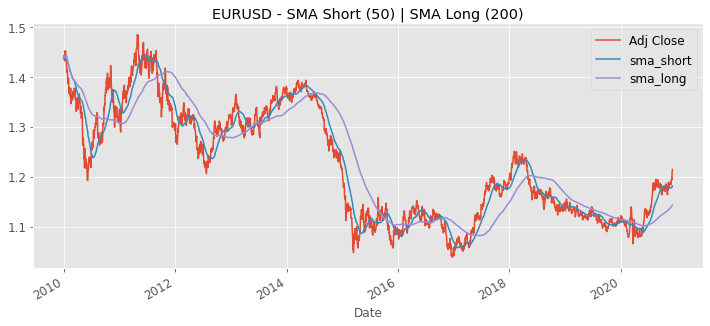

In [39]:
data[['Adj Close', 'sma_short', 'sma_long']].plot(figsize = (12,5), title = "EURUSD - SMA Short (50) | SMA Long (200)", fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

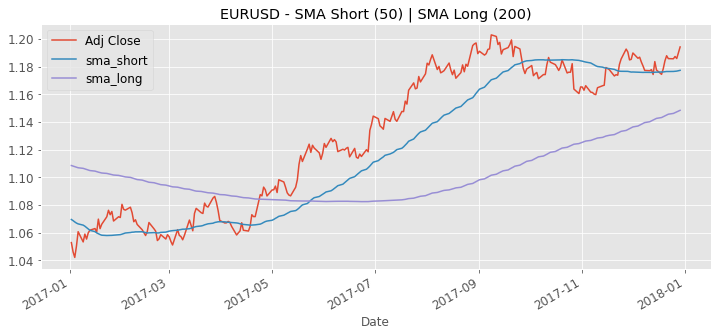

In [41]:
# Visualizando un anio de Data
data.loc['2017'][['Adj Close', 'sma_short', 'sma_long']].plot(figsize = (12,5), title = "EURUSD - SMA Short (50) | SMA Long (200)", fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

Ahora que tenemos los valores de las SMA's,  vamos a crear la columna **posicion**, que va a guardar los valores que representaran **compra/long** o **venta/short**, representados por **+1** y **-1**, respectivamente.

In [44]:
data['posicion'] = np.where(data['sma_short'] > data['sma_long'], 1, -1)

Explicacion del codigo: 
- Para la nueva columna ***data['posicion']***, If *data['sma_rapida']* es mayor a *data['sma_lenta']*, colocar 1, de lo contrario colocar -1

In [45]:
data

Output hidden; open in https://colab.research.google.com to view.

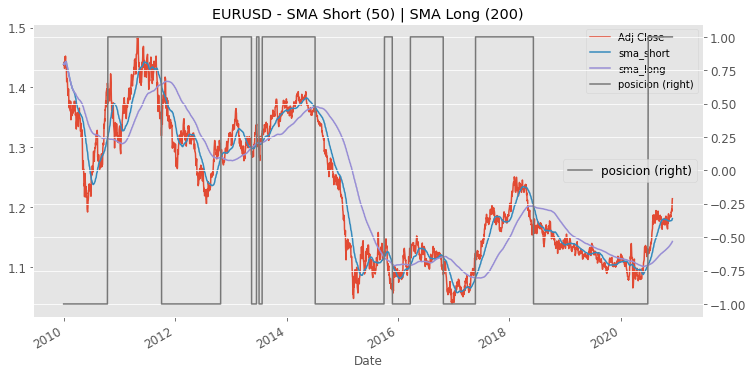

In [46]:
data[['Adj Close', 'sma_short', 'sma_long', 'posicion']].plot(figsize = (12,6),
                                                              title = "EURUSD - SMA Short (50) | SMA Long (200)",
                                                              fontsize=12,
                                                              secondary_y = 'posicion')
plt.legend(fontsize = 12)
plt.show()

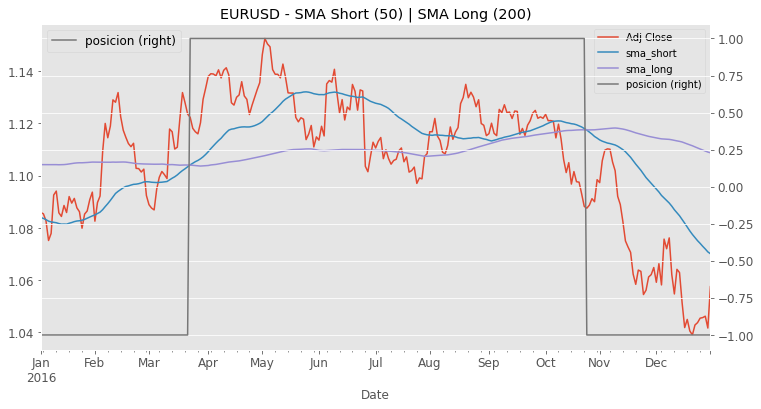

In [49]:
data.loc['2016',['Adj Close', 'sma_short', 'sma_long', 'posicion']].plot(figsize = (12,6),
                                                              title = "EURUSD - SMA Short (50) | SMA Long (200)",
                                                              fontsize=12,
                                                              secondary_y = 'posicion')
plt.legend(fontsize = 12)
plt.show()

# Vectorizando la Estrategia
Se le llama así ya que se **vectoriza** la estrategia al colocar 1 o -1 a las operaciones de la compra o venta

In [23]:
# "Magic Command" para visualizar los dataframes en Excell
%load_ext google.colab.data_table

In [24]:
data

,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,posicion
Date,,,,,,,,,
2021-01-01,1.217285,1.221699,1.213499,1.218027,1.218027,0,1.218027,1.218027,-1
2021-01-04,1.224905,1.230999,1.217137,1.225070,1.225070,0,1.221548,1.221548,-1
2021-01-05,1.225295,1.229483,1.224995,1.225160,1.225160,0,1.222752,1.222752,-1
2021-01-06,1.229861,1.235025,1.226693,1.230027,1.230027,0,1.224571,1.224571,-1
2021-01-07,1.233776,1.234568,1.224665,1.234111,1.234111,0,1.226479,1.226479,-1
...,...,...,...,...,...,...,...,...,...
2022-01-27,1.124227,1.124480,1.113350,1.124354,1.124354,0,1.131474,1.170708,-1
2022-01-28,1.114616,1.117006,1.112335,1.114703,1.114703,0,1.131031,1.170274,-1
2022-01-31,1.115138,1.121692,1.114504,1.115237,1.115237,0,1.130784,1.169806,-1


Ahora vamos a determinar los retornos compuestos, (como si corrieramos la estrategia Buy and Hold)
Tambien llamados **retornos logaritmicos** (log returns)

In [50]:
# data['retornos_del_instrumento'] = np.log(data['Adj Close'].div(data['Adj Close'].shift(1)))

# o tambien

data['retornos_del_instrumento'] = data['Adj Close'].pct_change()

In [51]:
data.head(3)

,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,posicion,retornos_del_instrumento
Date,,,,,,,,,,
2010-01-01,1.432706,1.440196,1.432706,1.438994,1.438994,0,1.438994,1.438994,-1,NaN
2010-01-04,1.431004,1.445191,1.426208,1.442398,1.442398,0,1.440696,1.440696,-1,0.002366
2010-01-05,1.442710,1.448310,1.435194,1.436596,1.436596,0,1.439329,1.439329,-1,-0.004022


Ahora tenemos que transformar los valores de **posicion** como senales de compra o venta, como *comprar y mantener* o *vender y mantener* en cada cruce *(como si siguieramos la estrategia en la vida real)*

Recordemos que los datos y los SMA estan basados en los **precios de cierre**, por lo que cada señal en la columna de 'posición' corresponde al día SIGUIENTE, por eso es necesario cambiar los valores en la columna 'posicion' usando el metodo **shift()** (shift de 1 = cambio al dia anterior), y luego multiplicar ese valor por el *retorno de hoy* (fila actual)

In [52]:
data['estrategia_retorno'] = data['posicion'].shift(1) * data['retornos_del_instrumento']

In [53]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,posicion,retornos_del_instrumento,estrategia_retorno
Date,,,,,,,,,,,
2010-01-01,1.432706,1.440196,1.432706,1.438994,1.438994,0,1.438994,1.438994,-1,NaN,NaN
2010-01-04,1.431004,1.445191,1.426208,1.442398,1.442398,0,1.440696,1.440696,-1,0.002366,-0.002366
2010-01-05,1.442710,1.448310,1.435194,1.436596,1.436596,0,1.439329,1.439329,-1,-0.004022,0.004022
2010-01-06,1.436596,1.443460,1.429123,1.440403,1.440403,0,1.439598,1.439598,-1,0.002650,-0.002650
2010-01-07,1.440300,1.444481,1.430206,1.431803,1.431803,0,1.438039,1.438039,-1,-0.005971,0.005971


In [54]:
# Eliminando los valores NaN
data.dropna(inplace = True)

# Desempeño de la Estrategia
Primeramente necesitamos calcular los rendimientos acumulativos, tanto de la estrategia, como el instrumento que estamos estudiando

# Rendimientos Acumulativos

In [55]:
data['retornos_del_instrumento_acum'] = data['retornos_del_instrumento'].cumsum().apply(np.exp)
data['estrategia_retorno_acum'] = data['estrategia_retorno'].cumsum().apply(np.exp)

In [56]:
data

Output hidden; open in https://colab.research.google.com to view.

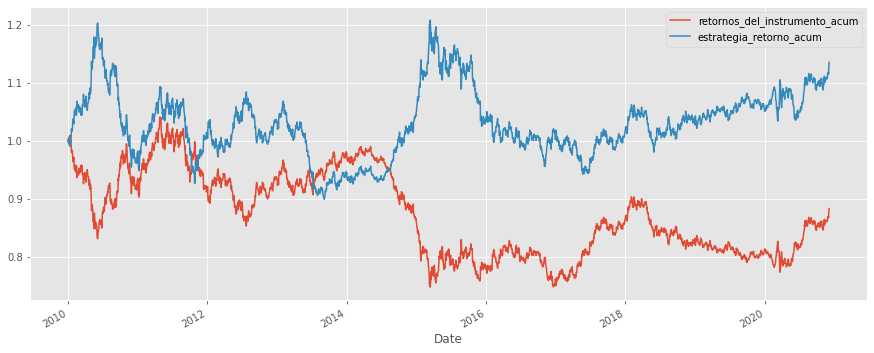

In [57]:
# Plotea los resultados acumulativos
data[['retornos_del_instrumento_acum', 'estrategia_retorno_acum']].plot(figsize = (15,6))
plt.show()

En el grafico anterior podemos ver el desempeño de nuestra estrategia en comparación al punto de refrencia o ***Benchmark*** (Comprar y mantener). 

Ahora, vamos a calcular con cuanto (%) nuestra estrategia ha superado  al Benchmark.

In [58]:
pct_superado = data['estrategia_retorno_acum'].iloc[-1] - data['retornos_del_instrumento_acum'].iloc[-1]
pct_superado

0.2523278137585754

En el resultado, podemos ver que nuestra estrategia ha superado al benchmark (Buy and Hold) por un **25%.** lo cual aparentemente es *bueno*, pero no olvidemos que segun el ultimo plot, se puede apreciar que nuestra estrategia no sigue un patron ganador constante a lo largo del timeframe, por lo que no es una estrategia confiable en su totalidad, y necesita mucho mas analisis antes de conlcuir si es una estrategia ganadora.

Eso es lo que vamos ha hacer ahora!



# Medidores de la Efectividad de Nuestra Estrategia

### **CAGR** *(Rendimiento Anual)*

Como ya tenemos el retorno acumulado de nuestra estrategia, *(**'estrategia_retornosss_acum'**)*. Vamos a usar solamente lo necesario de nuestra funcion inicial de CAGR

In [ ]:
# FUNCION INICIAL - NO EJECUTAREMOS ESTA FUNCION -------------------------------/
def CAGR(DF):
  df = DF.copy()
  df['retorno_diario']      = df['Adj Close'].pct_change()
  df['retorno_acumulado'] = (1 + df['retorno_diario']).cumprod() 
  numero_de_anios = len(df)/252 
  CAGR = (df['retorno_acumulado'][-1])**(1/numero_de_anios) -1 
  return CAGR
# FUNCION INICIAL - NO EJECUTAREMOS ESTA FUNCION -------------------------------/

In [59]:
numero_anios = len(data)/252
CAGR = (data['estrategia_retorno_acum'][-1])**(1/numero_anios) -1

In [60]:
CAGR

0.011301511864176605

Nuestra estrategia ha obtenido un CAGR de **1.1%**

# **Volatibilidad Anual** *(Riesgo Anual)*

In [ ]:
# FUNCION INICIAL - NO EJECUTAREMOS ESTA FUNCION -------------------------------/
def Volatilidad(DF):
  df = DF.copy()
  df['retorno_diario'] = df['Adj Close'].pct_change()
  vol = df['retorno_diario'].std()* np.sqrt(252) 
  return vol
# FUNCION INICIAL - NO EJECUTAREMOS ESTA FUNCION -------------------------------/

In [61]:
vol = data['estrategia_retorno'].std() * np.sqrt(252)

In [62]:
vol

0.08934832807927007

La Volatibilidad anual de la estrategia es de **8.9%**

# Sharpe Ratio

In [ ]:
# FUNCION INICIAL - NO EJECUTAREMOS ESTA FUNCION -------------------------------/
def Sharpe(DF, riskfree_rate=0.022):
  df = DF.copy()
  sharpe_ratio = (CAGR(df) - riskfree_rate) / Volatilidad(df)
  return sharpe_ratio
# FUNCION INICIAL - NO EJECUTAREMOS ESTA FUNCION -------------------------------/

In [63]:
sharpe_ratio = (CAGR - 0.022) / vol

In [64]:
sharpe_ratio

-0.1197390971471975

El Sharpe Ratio de nuestra estrategia es de -0.12

# Sortino Ratio

In [ ]:
# FUNCION INICIAL - NO EJECUTAREMOS ESTA FUNCION -------------------------------/
def Sortino(DF, riskfree_rate=0.022):
  df = DF.copy()
  df['retorno_diario'] = df['Adj Close'].pct_change()
  neg_vol = df[df['retorno_diario'] < 0]['retorno_diario'].std()* np.sqrt(252) 
  sortino_ratio = (CAGR(df) - riskfree_rate) / neg_vol
  return sortino_ratio
# FUNCION INICIAL - NO EJECUTAREMOS ESTA FUNCION -------------------------------/

In [65]:
neg_vol = data[data['estrategia_retorno'] < 0]['estrategia_retorno'].std() * np.sqrt(252)
sortino_ratio = (CAGR - 0.022) / neg_vol

In [66]:
sortino_ratio

-0.17104929872365912

El Sortino Ratio de nuestra estrategia es de -0.17

# **Maximum Drawdown**

In [ ]:
# FUNCION INICIAL - NO EJECUTAREMOS ESTA FUNCION -------------------------------/
def MDD(DF):
  df = DF.copy()
  df['retorno_diario']      = df['Adj Close'].pct_change()
  df['retorno_acumulativo'] = (1 + df['retorno_diario']).cumprod() 
  df['max_ret_acum']        = df['retorno_acumulativo'].cummax()
  df['drawdown']            = df['max_ret_acum'] - df['retorno_acumulativo']
  df['drawdown_pct']        = df['drawdown'] / df['max_ret_acum']
  mdd                       = df['drawdown_pct'].max()
  return mdd
# FUNCION INICIAL - NO EJECUTAREMOS ESTA FUNCION -------------------------------/

In [67]:
data['max_ret_acum'] = data['estrategia_retorno_acum'].cummax()
data['drawdown'] = data['max_ret_acum'] - data['estrategia_retorno_acum']
data['drawdown_pct'] = data['drawdown'] / data['max_ret_acum']
mdd = data['drawdown_pct'].max()

In [68]:
mdd

0.2525421921414052

El MDD de nuestra estrategia es de **25.2%**

# **Calmar Ratio**

In [ ]:
# FUNCION INICIAL - NO EJECUTAREMOS ESTA FUNCION -------------------------------/
def Calmar_Ratio(DF):
  df = DF.copy()
  calmar = CAGR(df) / MDD(df)
  return calmar
# FUNCION INICIAL - NO EJECUTAREMOS ESTA FUNCION -------------------------------/

In [69]:
calmar = CAGR / mdd

In [70]:
calmar

0.044750985046683144

El Calmar Ratio de nuestra estrategia es de **0.04**

# **Conclusion**

---
# **Conclusión**

Podemos ver que lo que parecía una *buena estrategia*, en realidad resulto ser una estrategia muy pobre.

Recordemos también que: No deberíamos seguir una estrategia que no supere claramente al benchmark (sin incluir los costos de Trading), ya que para que una estrategia sea prometedora, debe existir una ventaja claramente superior, y así, sea capaz de absorber los costos adicionales.

A continuación estaremos añadiendo más características a nuestro algoritmo/estrategia, que nos permitirá saber si el concepto inicial (de la estrategia) tiene algun potencial real, o si debemos desecharla por completo.